# State of Languages on Wikimedia Commons

_in progress_

Important note: the language(s) of the caption(s) reported below are not determined by language detection; they represent the language selected by the user during the upload of the file and/or the edit of the caption.

### Prep

In [1]:
# Packages
library(tidyverse)
library(here)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /srv/home/cmyrick/incubator-data-exploration



In [2]:
# Supress sci notation
options(scipen=999)

In [3]:
#Load data
df_import <- read_tsv(here("02_wrangling_scripts/temp_outputs/commons_caption_language_counts_(standardized).tsv"), show_col_types=F)

### How many files are captioned in each language?

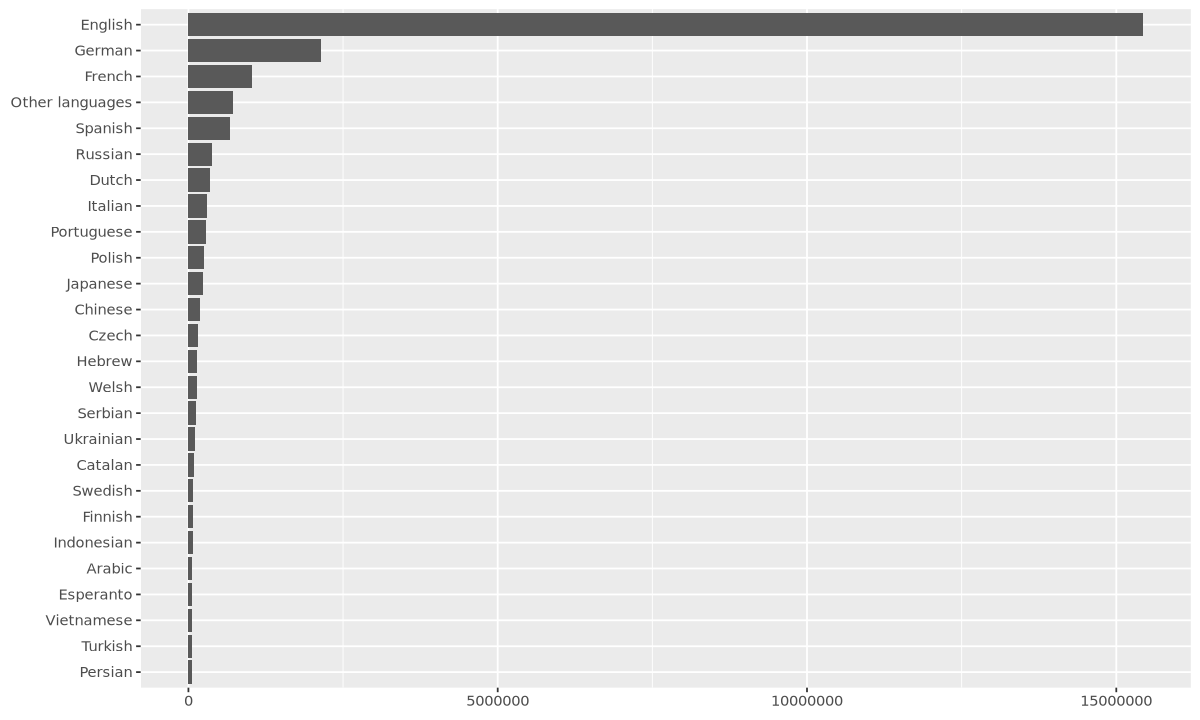

In [4]:
# Bucket counts for those with < 1000 captions
b <- df_import
b$buckets <- b$language_name
b$buckets[b$caption_count<50000] <- "Other languages"
b <- b %>% group_by(buckets) %>% summarise(caption_count=sum(caption_count))

# Plot
options(repr.plot.width=10, repr.plot.height=6)
b %>%
 ggplot(aes(x=reorder(buckets,caption_count), y=caption_count, label=caption_count)) +
 geom_bar(stat="identity") +
# geom_text() +
 coord_flip() +
 theme(axis.title = element_blank())

In [16]:
# Number of total languages with >=1 caption on Commons
nrow(df_import%>%
     filter(caption_count>=1) %>%
     select(language_name)%>%
     distinct(.))

[1] 440

In [17]:
# Number of total languages with >=100 captions on Commons
nrow(df_import%>%
     filter(caption_count>=100) %>%
     select(language_name)%>%
     distinct(.))

[1] 191

In [20]:
# Number of total languages with >=1000 captions on Commons
nrow(df_import%>%
     filter(caption_count>=1000) %>%
     select(language_name)%>%
     distinct(.))

[1] 101

In [22]:
# Number of total languages with >=10,000 captions on Commons
nrow(df_import%>%
     filter(caption_count>=10000) %>%
     select(language_name)%>%
     distinct(.))

[1] 51

In [26]:
# Number of total languages with >=100,000 captions on Commons
print(nrow(df_import%>%
     filter(caption_count>=100000) %>%
     select(language_name)%>%
     distinct(.)))

[1] 16


language_name
1  Chinese      
2  Czech        
3  Dutch        
4  English      
5  French       
6  German       
7  Hebrew       
8  Italian      
9  Japanese     
10 Polish       
11 Portuguese   
12 Russian      
13 Serbian      
14 Spanish      
15 Ukrainian    
16 Welsh